In [1]:
import numpy as np 
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras

from keras.layers import *
from keras import models
from keras.optimizers import *
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras import metrics
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split

In [2]:
def unet(input_size = (None,None,1)):
    inputs = Input(input_size)

    x = Conv2D(64, 3,activation='relu', padding='same') (inputs) 
    x = Conv2D(128, 3, strides=2, activation='relu', padding='same') (x)   
    x = Conv2D(128, 3, activation='relu', padding='same') (x)

    x = Conv2D(256, 3, strides=2, activation='relu', padding='same') (x)   
    x = Conv2D(256, 3, activation='relu', padding='same') (x)

    x = Conv2DTranspose(256, 3, activation='relu', padding='same') (x)
    x = Conv2DTranspose(256, 3, strides=2, activation='relu', padding='same') (x)

    x = Conv2DTranspose(128, 3, activation='relu', padding='same') (x)
    x = Conv2DTranspose(128, 3, strides=2, activation='relu', padding='same') (x)

    x = Conv2DTranspose(64, 3, activation='relu', padding='same') (x)
    x = Conv2DTranspose(64, 3, strides=2, activation='relu', padding='same') (x)            

    outputs= Conv2D(1,3, activation="sigmoid", padding="same")(x)

    model = models.Model(inputs=[inputs], outputs=[outputs])

    model.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = 'accuracy')
    model.summary()
    
    return model

In [10]:
def unet(input_size = (None,None,1)):
    inputs = Input(input_size)

    x = Conv2D(64, 3, strides=2, activation='relu', padding='same') (inputs)
    x = Conv2D(64, 3, activation='relu', padding='same') (x)  
    x = Conv2D(128, 3, strides=2, activation='relu', padding='same') (x)
    x = Conv2D(128, 3, activation='relu', padding='same') (x)
    x = Conv2D(256, 3, strides=2, activation='relu', padding='same') (x)
    x = Conv2D(256, 3, activation='relu', padding='same') (x)
    x = Conv2DTranspose(256, 3, activation='relu', padding='same') (x)
    x = Conv2DTranspose(256, 3, activation='relu', padding='same', strides=2) (x)
    x = Conv2DTranspose(128, 3, activation='relu', padding='same') (x)
    x = Conv2DTranspose(128, 3, activation='relu', padding='same', strides=2) (x)
    x = Conv2DTranspose(64, 3, activation='relu', padding='same') (x)
    x = Conv2DTranspose(64, 3, activation='relu', padding='same', strides=2) (x)    

    outputs= Conv2D(1,3, activation="sigmoid", padding="same")(x)

    model = models.Model(inputs=[inputs], outputs=[outputs])

    Optimizer=Adam(learning_rate=0.0001)
    model.compile(optimizer = Optimizer, loss = 'binary_crossentropy', metrics = 'accuracy')
    model.summary()
    
    return model

In [11]:
nx=128
ny=128
model=unet(input_size=(nx,ny,1))

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 128, 128, 1)]     0         
                                                                 
 conv2d_14 (Conv2D)          (None, 64, 64, 64)        640       
                                                                 
 conv2d_15 (Conv2D)          (None, 64, 64, 64)        36928     
                                                                 
 conv2d_16 (Conv2D)          (None, 32, 32, 128)       73856     
                                                                 
 conv2d_17 (Conv2D)          (None, 32, 32, 128)       147584    
                                                                 
 conv2d_18 (Conv2D)          (None, 16, 16, 256)       295168    
                                                                 
 conv2d_19 (Conv2D)          (None, 16, 16, 256)       5900

In [12]:
x_data = np.load(r'C:\Users\junha\Desktop\단층\reference\fault_images.npy')
y_data = np.load(r'C:\Users\junha\Desktop\단층\reference\fault_labels.npy')
X_train, X_test, Y_train, Y_test, = train_test_split(x_data, y_data, test_size=0.1, random_state=1121)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(468, 128, 128)
(468, 128, 128)
(52, 128, 128)
(52, 128, 128)


In [13]:
##training data
earlystopper = EarlyStopping(patience=10, verbose=1)
checkpointer = ModelCheckpoint('test_model.h5', verbose=1, save_best_only=True)
results = model.fit(X_train, Y_train, validation_split=0.3, batch_size=64, epochs=20)

Epoch 1/20


6/6 [==============================] - 12s 2s/step - loss: 0.6918 - accuracy: 0.9124 - val_loss: 0.6869 - val_accuracy: 0.9779
Epoch 2/20
6/6 [==============================] - 11s 2s/step - loss: 0.6762 - accuracy: 0.9766 - val_loss: 0.6224 - val_accuracy: 0.9779
Epoch 3/20
6/6 [==============================] - 11s 2s/step - loss: 0.5188 - accuracy: 0.9766 - val_loss: 0.2136 - val_accuracy: 0.9778
Epoch 4/20
6/6 [==============================] - 11s 2s/step - loss: 0.2048 - accuracy: 0.9766 - val_loss: 0.2537 - val_accuracy: 0.9778
Epoch 5/20
6/6 [==============================] - 11s 2s/step - loss: 0.2352 - accuracy: 0.9766 - val_loss: 0.1584 - val_accuracy: 0.9779
Epoch 6/20
6/6 [==============================] - 11s 2s/step - loss: 0.1668 - accuracy: 0.9766 - val_loss: 0.1778 - val_accuracy: 0.9779
Epoch 7/20
6/6 [==============================] - 11s 2s/step - loss: 0.1669 - accuracy: 0.9766 - val_loss: 0.1510 - val_accuracy: 0.9779
Epoch 8/20
6/6 [================

In [13]:
preds_train=model.predict(X_train, verbose=1)
preds_test=model.predict(X_test, verbose=1)

2/2 [==============================] - 0s 183ms/step


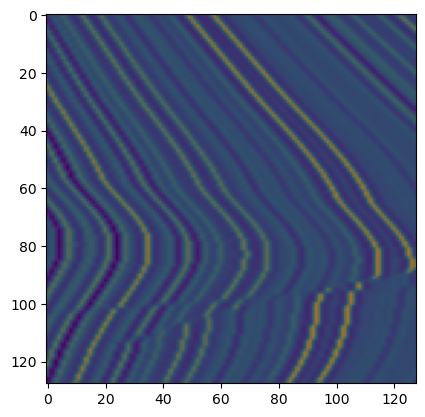

In [14]:
import matplotlib.pyplot as plt
plt.imshow(preds_train[0])
plt.imshow(X_train[0],alpha=0.5)

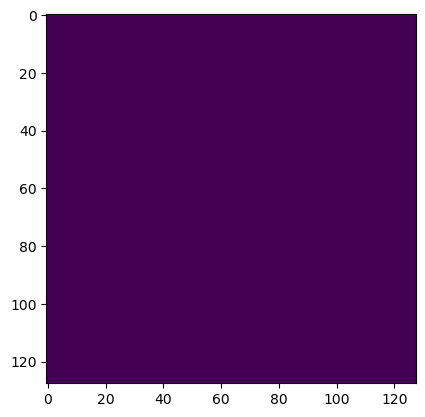

In [15]:
plt.imshow(preds_train[1])